In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
from os import listdir
from numpy import asarray, load
from matplotlib import pyplot
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import os
import pandas as pd
import pickle

In [52]:
# dataset path
X = "/content/drive/MyDrive/Colab Notebooks/road_segmentation_ideal/training/input/"
Y = "/content/drive/MyDrive/Colab Notebooks/road_segmentation_ideal/training/output/"

In [53]:
image_dataset=pd.DataFrame()

In [54]:
for image in os.listdir(X):
  df=pd.DataFrame()
  input_img=cv2.imread(X+image)
  if input_img.ndim == 3 and input_img.shape[-1]==3:
    img=cv2.cvtColor(input_img,cv2.COLOR_BGR2GRAY)
  elif input_img.ndim==2:
    img = input_img
  else:
    raise Exception("model works only on RBG and gray images")

In [55]:
pixel_values =img.reshape(-1)
df['Pixel_Value']=pixel_values
df['Image_Name']=image

In [56]:
#Generate Gabor features
num = 1  #To count numbers up in order to give Gabor features a lable in the data frame
kernels = []
for theta in range(2):   #Define number of thetas
    theta = theta / 4. * np.pi
    for sigma in (1, 3):  #Sigma with 1 and 3
        for lamda in np.arange(0, np.pi, np.pi / 4):   #Range of wavelengths
            for gamma in (0.05, 0.5):   #Gamma values of 0.05 and 0.5
                gabor_label = 'Gabor' + str(num)  #Label Gabor columns as Gabor1, Gabor2, etc.
                #print(gabor_label)
                ksize=9
                kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                kernels.append(kernel)
                #Now filter the image and add values to a new column 
                fimg = cv2.filter2D(img, cv2.CV_8UC3, kernel)
                filtered_img = fimg.reshape(-1)
                df[gabor_label] = filtered_img  #Labels columns as Gabor1, Gabor2, etc.
                print(gabor_label, ': theta=', theta, ': sigma=', sigma, ': lamda=', lamda, ': gamma=', gamma)
                num += 1  #Increment for gabor column label
                

Gabor1 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.05
Gabor2 : theta= 0.0 : sigma= 1 : lamda= 0.0 : gamma= 0.5
Gabor3 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor4 : theta= 0.0 : sigma= 1 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor5 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor6 : theta= 0.0 : sigma= 1 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor7 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.05
Gabor8 : theta= 0.0 : sigma= 1 : lamda= 2.356194490192345 : gamma= 0.5
Gabor9 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.05
Gabor10 : theta= 0.0 : sigma= 3 : lamda= 0.0 : gamma= 0.5
Gabor11 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.05
Gabor12 : theta= 0.0 : sigma= 3 : lamda= 0.7853981633974483 : gamma= 0.5
Gabor13 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.05
Gabor14 : theta= 0.0 : sigma= 3 : lamda= 1.5707963267948966 : gamma= 0.5
Gabor15 : theta= 0.0 : sigma= 3 : lamda= 2

In [57]:
from skimage.filters import roberts, sobel, scharr, prewitt

#Gerate OTHER FEATURES and add them to the data frame
                
#CANNY EDGE
edges = cv2.Canny(img, 100,200)   #Image, min and max values
edges1 = edges.reshape(-1)
df['Canny Edge'] = edges1 #Add column to original dataframe


#ROBERTS EDGE
edge_roberts = roberts(img)
edge_roberts1 = edge_roberts.reshape(-1)
df['Roberts'] = edge_roberts1

#SOBEL
edge_sobel = sobel(img)
edge_sobel1 = edge_sobel.reshape(-1)
df['Sobel'] = edge_sobel1

#SCHARR
edge_scharr = scharr(img)
edge_scharr1 = edge_scharr.reshape(-1)
df['Scharr'] = edge_scharr1

#PREWITT
edge_prewitt = prewitt(img)
edge_prewitt1 = edge_prewitt.reshape(-1)
df['Prewitt'] = edge_prewitt1

#GAUSSIAN with sigma=3
from scipy import ndimage as nd
gaussian_img = nd.gaussian_filter(img, sigma=3)
gaussian_img1 = gaussian_img.reshape(-1)
df['Gaussian s3'] = gaussian_img1

#GAUSSIAN with sigma=7
gaussian_img2 = nd.gaussian_filter(img, sigma=7)
gaussian_img3 = gaussian_img2.reshape(-1)
df['Gaussian s7'] = gaussian_img3

#MEDIAN with sigma=3
median_img = nd.median_filter(img, size=3)
median_img1 = median_img.reshape(-1)
df['Median s3'] = median_img1

#VARIANCE with size=3
variance_img = nd.generic_filter(img, np.var, size=3)
variance_img1 = variance_img.reshape(-1)
df['Variance s3'] = variance_img1  #Add column to original dataframe


In [58]:
image_dataset=image_dataset.append(df)

In [59]:
mask_dataset = pd.DataFrame()

In [60]:
for mask in os.listdir(Y):
  df2=pd.DataFrame()
  input_mask=cv2.imread(Y+mask)
  if input_mask.ndim == 3 and input_mask.shape[-1]==3:
    label=cv2.cvtColor(input_mask,cv2.COLOR_BGR2GRAY)
  elif input_mask.ndim==2:
    label = input_mask
  else:
    raise Exception("model works only on RBG and gray images")

In [61]:
label_values =label.reshape(-1)
df2['Label_Value']=label_values
df2['Mask_Name']=image

In [62]:
mask_dataset=mask_dataset.append(df2)

In [63]:
dataset=pd.concat([image_dataset,mask_dataset],axis=1)

In [64]:
dataset=dataset[dataset.Label_Value!=0]

In [65]:
#Define the dependent variable that needs to be predicted (labels)
Y = dataset["Label_Value"].values

#Define the independent variables
X = dataset.drop(labels = ["Image_Name","Mask_Name","Label_Value"], axis=1) 

In [66]:
dataset.head()

,Pixel_Value,Image_Name,Gabor1,Gabor2,Gabor3,Gabor4,Gabor5,Gabor6,Gabor7,Gabor8,Gabor9,Gabor10,Gabor11,Gabor12,Gabor13,Gabor14,Gabor15,Gabor16,Gabor17,Gabor18,Gabor19,Gabor20,Gabor21,Gabor22,Gabor23,Gabor24,Gabor25,Gabor26,Gabor27,Gabor28,Gabor29,Gabor30,Gabor31,Gabor32,Canny Edge,Roberts,Sobel,Scharr,Prewitt,Gaussian s3,Gaussian s7,Median s3,Variance s3,Label_Value,Mask_Name
196,76,img-997.png,0,0,255,200,149,69,76,36,0,0,242,211,0,0,0,0,0,0,255,255,0,1,118,23,0,0,255,255,0,0,80,64,255,0.091466,0.069987,0.069025,0.071269,77,79,75,141,255,img-997.png
197,88,img-997.png,0,0,255,253,184,94,95,46,0,0,255,255,0,0,0,0,0,0,255,255,82,0,113,15,0,0,255,255,78,40,60,37,255,0.051580,0.054233,0.055079,0.053427,78,77,77,93,255,img-997.png
198,83,img-997.png,0,0,255,250,120,80,20,29,0,0,187,176,0,0,0,0,0,0,255,255,21,11,67,9,0,0,255,255,52,43,0,0,0,0.043404,0.017674,0.015293,0.022829,79,76,84,56,255,img-997.png
199,84,img-997.png,0,0,255,251,198,82,114,36,0,0,255,223,0,0,0,0,0,0,255,255,17,0,192,33,0,0,255,255,0,0,169,130,0,0.058298,0.053957,0.053567,0.055150,80,74,84,82,255,img-997.png
200,98,img-997.png,0,0,255,255,126,81,34,19,0,0,255,255,0,0,0,0,0,0,255,255,130,61,255,82,0,0,255,255,87,76,169,127,0,0.104383,0.065686,0.057617,0.076496,80,72,97,196,255,img-997.png


In [67]:
#Split data into train and test to verify accuracy after fitting the model. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=20)

In [68]:
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with n number of decision trees
model = RandomForestClassifier(n_estimators = 50, random_state = 42)

In [69]:
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [70]:
from sklearn import metrics
predection_test=model.predict(X_test)
print("Accuracy=", metrics.accuracy_score(y_test,predection_test))

Accuracy= 1.0


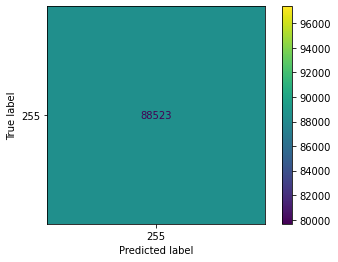

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
cm = confusion_matrix(y_test, predection_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
disp.plot()
plt.show()

In [72]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score
print(classification_report(y_test, predection_test))

              precision    recall  f1-score   support

         255       1.00      1.00      1.00     88523

    accuracy                           1.00     88523
   macro avg       1.00      1.00      1.00     88523
weighted avg       1.00      1.00      1.00     88523



In [73]:
model_name="RF_model"
pickle.dump(model,open(model_name,'wb'))

In [74]:
def feature_extraction(img):
    df = pd.DataFrame()


#All features generated must match the way features are generated for TRAINING.
#Feature1 is our original image pixels
    img2 = img.reshape(-1)
    df['Pixel_Value'] = img2

#Generate Gabor features
    num = 1
    kernels = []
    for theta in range(2):
        theta = theta / 4. * np.pi
        for sigma in (1, 3):
            for lamda in np.arange(0, np.pi, np.pi / 4):
                for gamma in (0.05, 0.5):
#               print(theta, sigma, , lamda, frequency)
                
                    gabor_label = 'Gabor' + str(num)
#                    print(gabor_label)
                    ksize=9
                    kernel = cv2.getGaborKernel((ksize, ksize), sigma, theta, lamda, gamma, 0, ktype=cv2.CV_32F)    
                    kernels.append(kernel)
                    #Now filter image and add values to new column
                    fimg = cv2.filter2D(img2, cv2.CV_8UC3, kernel)
                    filtered_img = fimg.reshape(-1)
                    df[gabor_label] = filtered_img  #Modify this to add new column for each gabor
                    num += 1
########################################
#Geerate OTHER FEATURES and add them to the data frame
#Feature 3 is canny edge
    edges = cv2.Canny(img, 100,200)   #Image, min and max values
    edges1 = edges.reshape(-1)
    df['Canny Edge'] = edges1 #Add column to original dataframe

    from skimage.filters import roberts, sobel, scharr, prewitt

#Feature 4 is Roberts edge
    edge_roberts = roberts(img)
    edge_roberts1 = edge_roberts.reshape(-1)
    df['Roberts'] = edge_roberts1

#Feature 5 is Sobel
    edge_sobel = sobel(img)
    edge_sobel1 = edge_sobel.reshape(-1)
    df['Sobel'] = edge_sobel1

#Feature 6 is Scharr
    edge_scharr = scharr(img)
    edge_scharr1 = edge_scharr.reshape(-1)
    df['Scharr'] = edge_scharr1

    #Feature 7 is Prewitt
    edge_prewitt = prewitt(img)
    edge_prewitt1 = edge_prewitt.reshape(-1)
    df['Prewitt'] = edge_prewitt1

    #Feature 8 is Gaussian with sigma=3
    from scipy import ndimage as nd
    gaussian_img = nd.gaussian_filter(img, sigma=3)
    gaussian_img1 = gaussian_img.reshape(-1)
    df['Gaussian s3'] = gaussian_img1

    #Feature 9 is Gaussian with sigma=7
    gaussian_img2 = nd.gaussian_filter(img, sigma=7)
    gaussian_img3 = gaussian_img2.reshape(-1)
    df['Gaussian s7'] = gaussian_img3

    #Feature 10 is Median with sigma=3
    median_img = nd.median_filter(img, size=3)
    median_img1 = median_img.reshape(-1)
    df['Median s3'] = median_img1

    #Feature 11 is Variance with size=3
    variance_img = nd.generic_filter(img, np.var, size=3)
    variance_img1 = variance_img.reshape(-1)
    df['Variance s3'] = variance_img1  #Add column to original dataframe


    return df

In [75]:
filename ="RF_model"
loaded_model=pickle.load(open(filename,'rb'))

X_val = "/content/drive/MyDrive/Colab Notebooks/road_segmentation_ideal/testing/input/"

IndexError: ignored

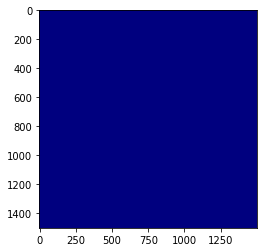

In [76]:
from matplotlib import pyplot as plt
for file in os.listdir(X_val):
    #print(file)     #just stop here to see all file names printed
    img1= cv2.imread(X_val+file)
    img = cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)

#Call the feature extraction function.
    X = feature_extraction(img)
    result = loaded_model.predict(X)
    segmented = result.reshape((img.shape))
    plt.imshow(segmented, cmap ='jet')
    name = file.split("e_")
    plt.imsave('/content/drive/MyDrive/Colab Notebooks/road_segmentation_ideal/Segmented/'+ name[1], segmented, cmap ='jet')